In [2]:
fig_dir = "../../figures/"
fig_ext = "pdf"

In [3]:
import thesis
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
cm = cmap.inferno

%matplotlib inline

In [4]:
import numpy as np
import scipy as sp
import theano
import theano.tensor as tt
import theano.tensor.nlinalg
import sys
#sys.path.insert(0, "../../..")
import pymc3 as pm

/home/daniel/.virtualenvs/deimos.astro.gla.ac.uk/heron-stable/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


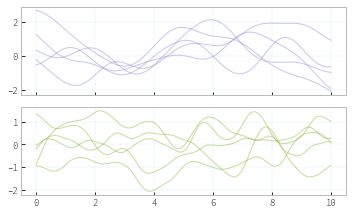

In [4]:
fig, ax = plt.subplots(2,1, figsize=(3.5,3.5/1.616), sharex=True);
cov_func = pm.gp.cov.RatQuad(1, ls=1, alpha=0.5)
cov_func_es = pm.gp.cov.ExpQuad(1, ls=1)
X = np.linspace(0, 10, 200)[:,None]
K = cov_func(X).eval()
ax[1].plot(X, pm.MvNormal.dist(mu=np.zeros(K.shape[0]), cov=K).random(size=5).T, 
             alpha = 0.5, c='#8EBA42', lw=1
            );
K = cov_func_es(X).eval()
ax[0].plot(X, pm.MvNormal.dist(mu=np.zeros(K.shape[0]), cov=K).random(size=5).T, 
             alpha = 0.5, c='#988ED5', lw=1
            );
fig = thesis.thesisify(fig)

In [64]:
lengthscale = 0.2
eta = 2.0
cov = eta**2 * pm.gp.cov.ExpQuad(1, lengthscale)

def plot_covariance_overview(cov, scales):

    f = plt.figure(dpi=300)

    X = np.linspace(0, 2, 200)[:,None]
    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=1, rowspan=3)
    
    
    
    ax1.set_title("$k(r)$",  fontdict=thesis.lato)
    ax1.set_xlabel("$r$",  fontdict=thesis.lato)
    ax1.set_ylabel("$k(r)$",  fontdict=thesis.lato)
    ax1.set_xlim([0,2])
    colors = thesis.colors.values()
    
    ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)  
    ax2.xaxis.set_ticks([])
    
    for i, scale in enumerate(scales):
        
        ax2 = plt.subplot2grid((3, 3), (i, 1), colspan=2, )
        if i == 0:
            ax2.set_title(r"Samples from GP", fontdict=thesis.lato)
        ax2.set_xlim([0,2])
        ax2.set_ylim(-2.5, 2.5)
        cov_f = cov(1, scale)
        K = cov_f(X).eval()
        ax2.set_xticks(ax2.get_xticks()[1:-1])
        if not i == 2: 
            ax2.xaxis.set_ticks([])
        ax2.yaxis.tick_right()
        ax1.plot(X, K[:,0], lw=1, color=colors[i], label="l={}".format(scale) )
        ax2.plot(X, pm.MvNormal.dist(mu=np.zeros(K.shape[0]), cov=K).random(size=3).T, color=colors[i], lw=1, alpha=0.8);
        ax1.legend(prop=thesis.ssp_legend)

    ax2.set_xlabel("$x$")
    thesis.thesisify(f, height=1);
    f.subplots_adjust(hspace=0.01, wspace=0.01)
    
    
    
    return f

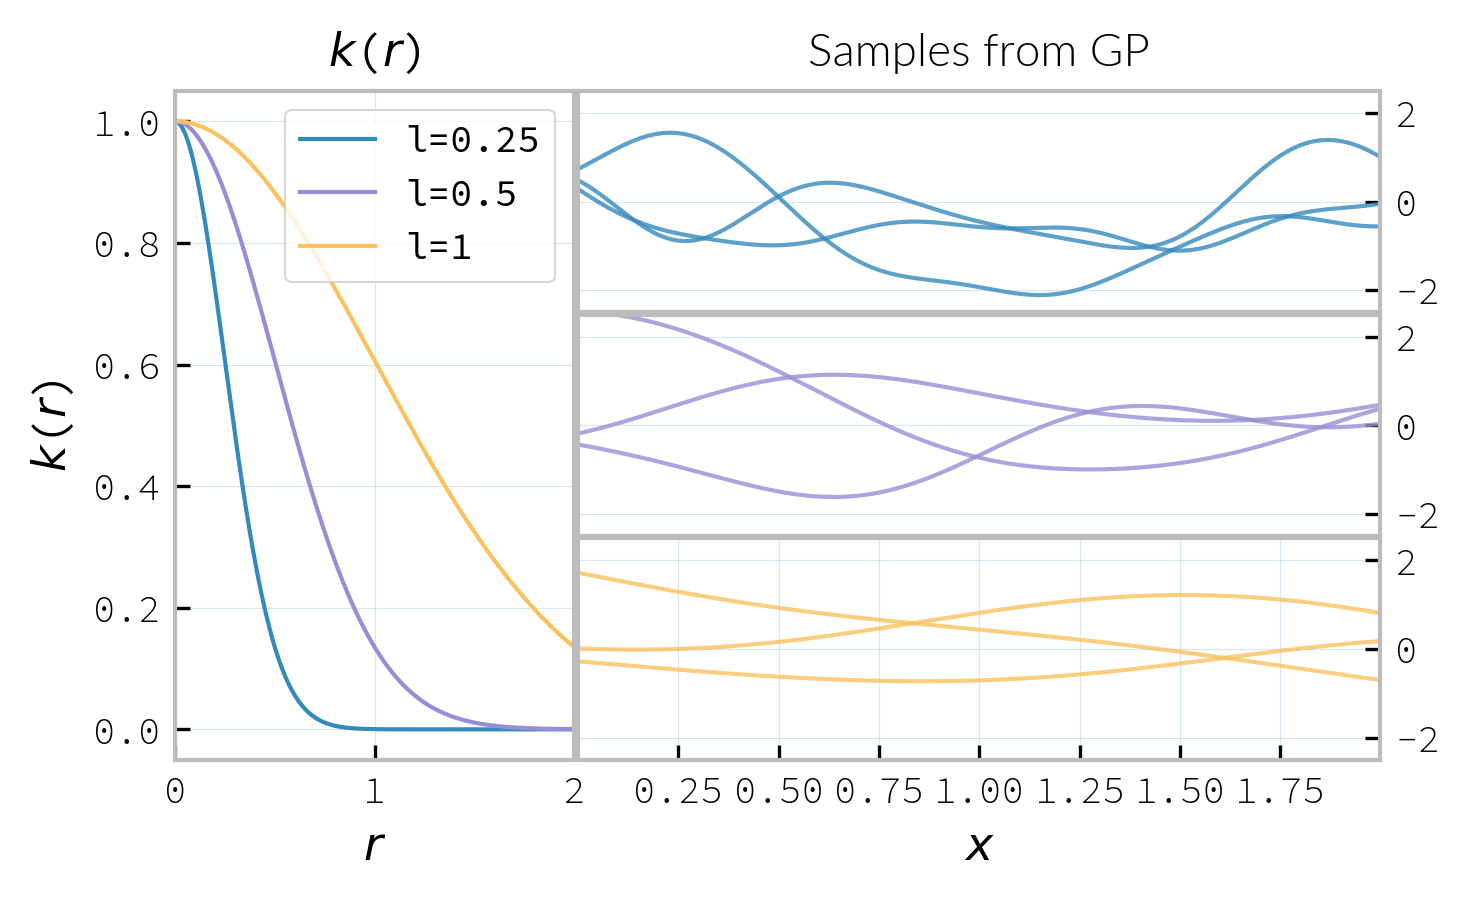

In [65]:
f = plot_covariance_overview(pm.gp.cov.ExpQuad, [0.25, 0.5, 1])
f.savefig("../../figures/gp/covariance-se-overview.pdf")

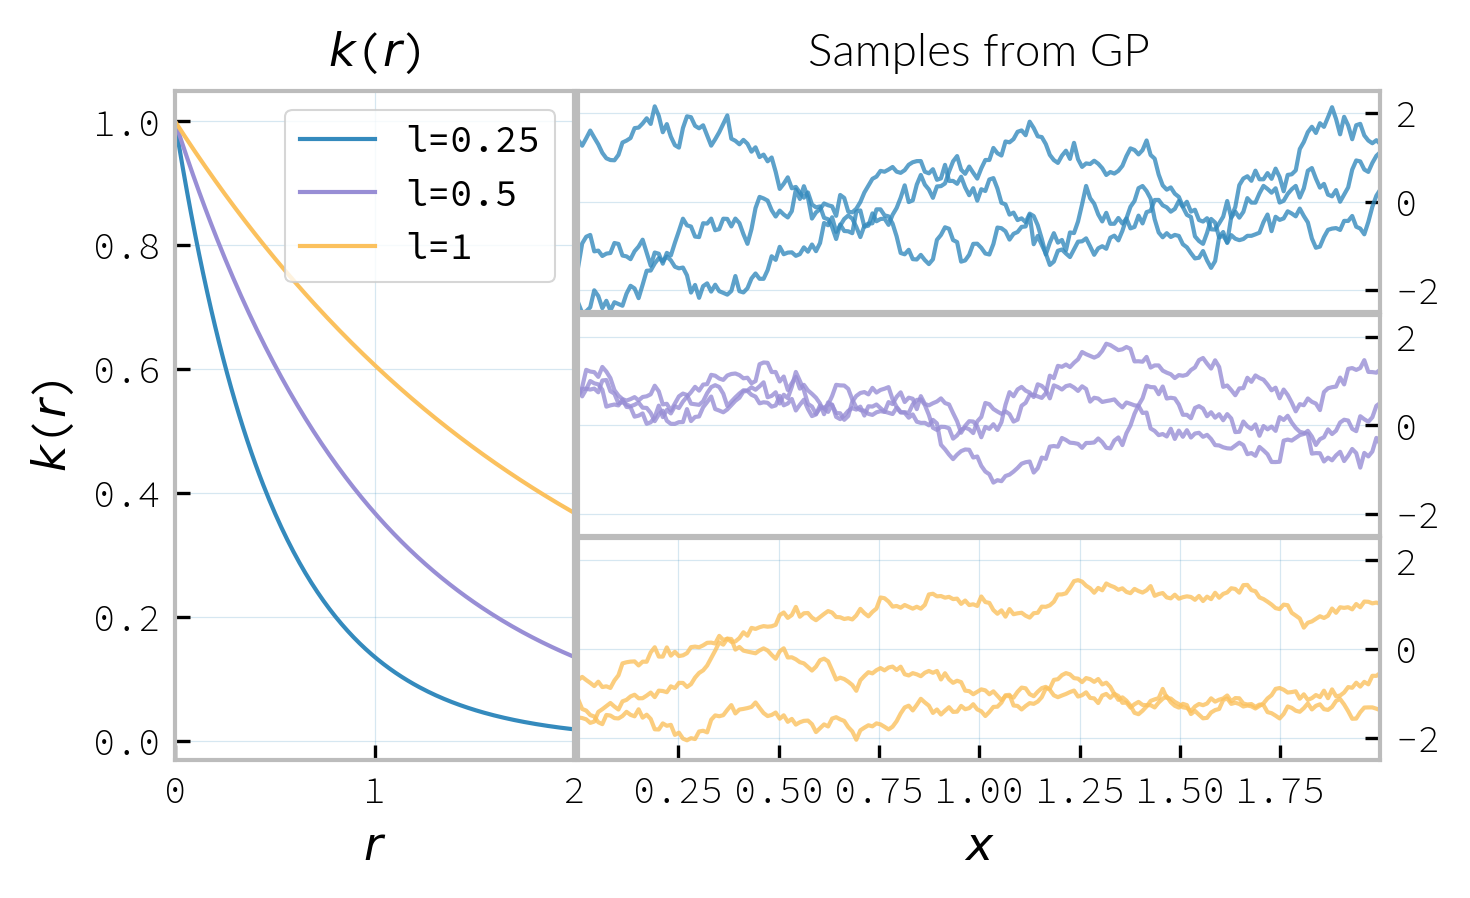

In [66]:
f = plot_covariance_overview(pm.gp.cov.Exponential, [0.25, 0.5, 1])
f.savefig("../../figures/gp/covariance-ex-overview.pdf")

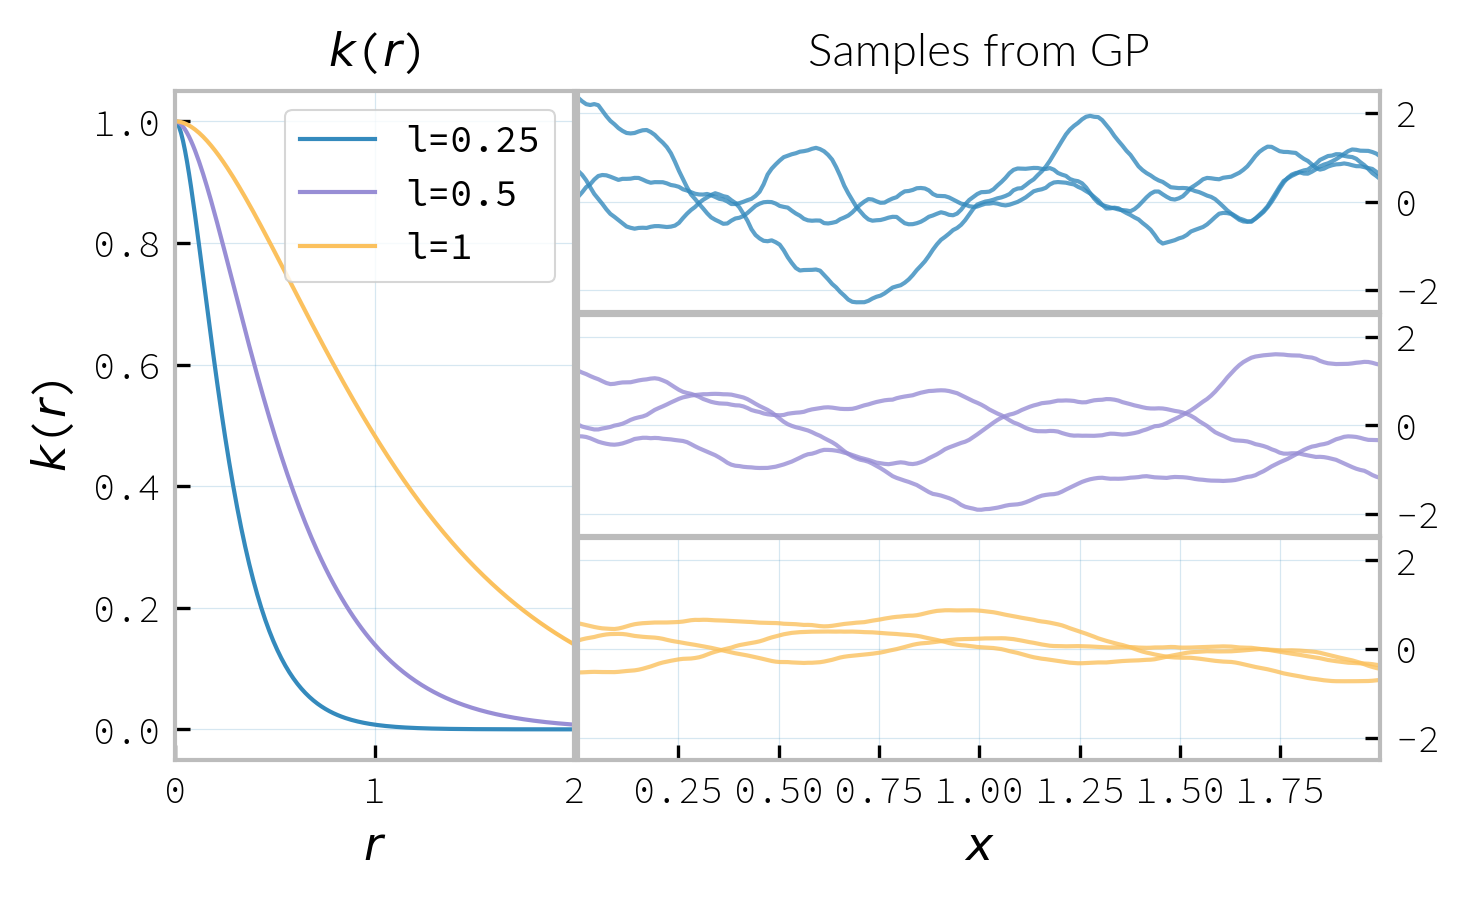

In [67]:
f = plot_covariance_overview(pm.gp.cov.Matern32, [0.25, 0.5, 1])
f.savefig("../../figures/gp/covariance-mat32-overview.pdf")

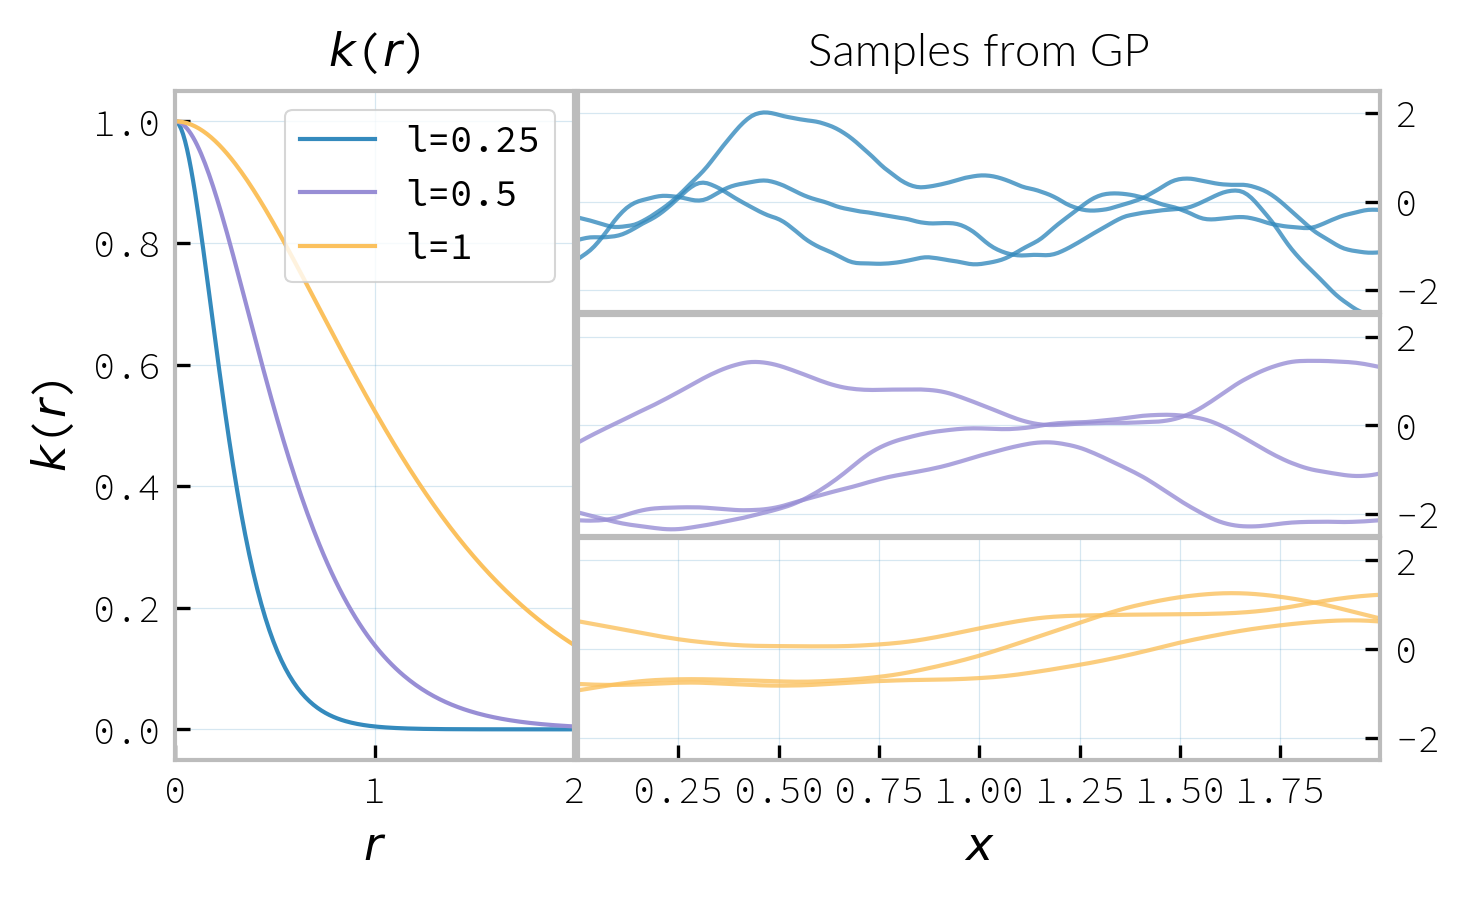

In [68]:
f = plot_covariance_overview(pm.gp.cov.Matern52, [0.25, 0.5, 1])
f.savefig("../../figures/gp/covariance-mat52-overview.pdf")

In [19]:
np.arange(-2,2,0.5)

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5])

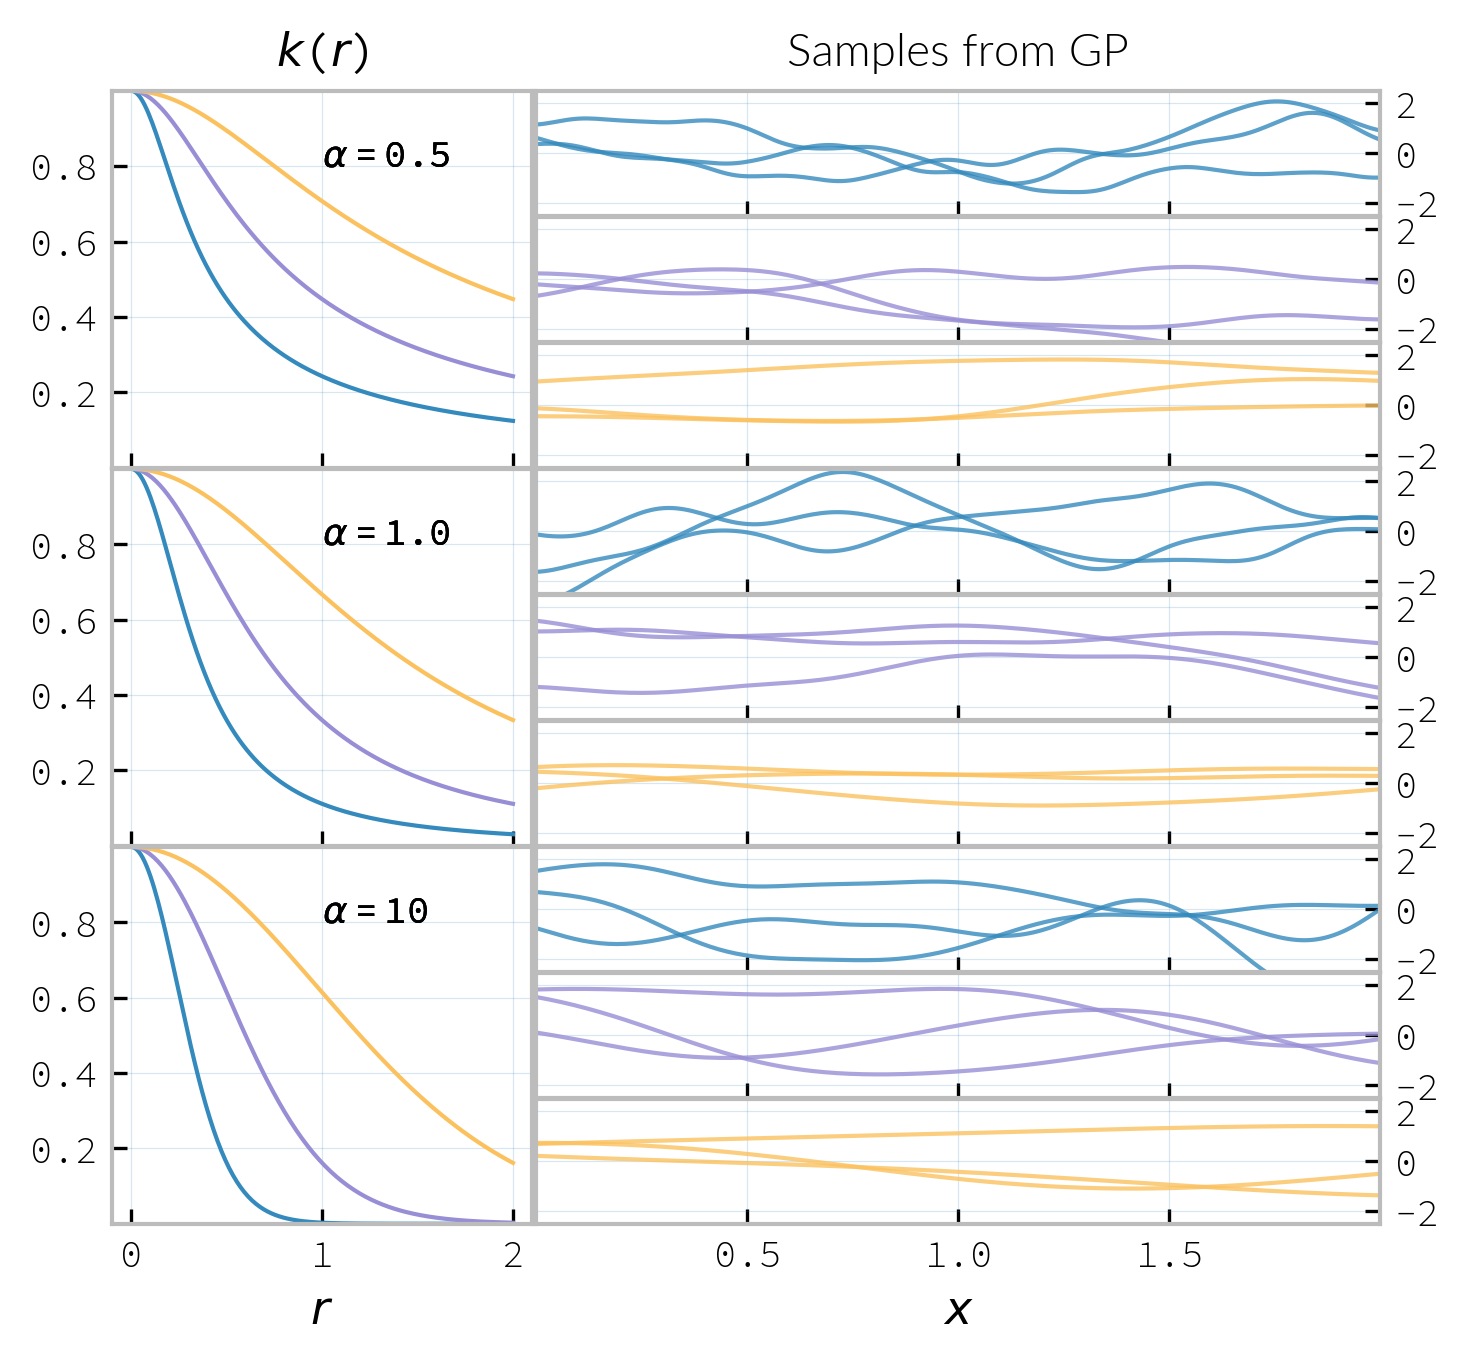

In [34]:
lengthscale = 0.2
eta = 2.0
cov = pm.gp.cov.RatQuad#(1, alpha=0)

f = plt.figure(dpi=300)

X = np.linspace(0, 2, 200)[:,None]

for j, alpha in enumerate([0.5, 1.0, 10]):
    ax1 = plt.subplot2grid((9, 3), (3*j, 0), colspan=1, rowspan=3)
    if j == 0:
        ax1.set_title("$k(r)$",  fontdict=thesis.lato)
    ax1.set_xlabel("$r$",  fontdict=thesis.lato)

    #ax2.set_title(r"Samples from $k$", fontdict=thesis.lato)
    #ax1.set_title("$k(r)$",  fontdict=thesis.lato)
    #ax1.set_xlabel("$r$",  fontdict=thesis.lato)
    #ax1.set_ylabel("$k(r)$",  fontdict=thesis.lato)

    colors = thesis.colors.values()

    scales = [0.25, 0.5, 1]

    for i, scale in enumerate(scales):
        cov_f = cov(1, alpha, ls=scale)
        K = cov_f(X).eval()
        
        
        
        ax1.plot(X, K[:,0], lw=1, color=colors[i], label="l={}".format(scale) )
        ax1.text(1,0.8, r"$\alpha = {}$".format(alpha), fontdict=thesis.ssp_legend)
        ax2 = plt.subplot2grid((9, 3), (3*j+i, 1), colspan=2)
        ax2.plot(X, pm.MvNormal.dist(mu=np.zeros(K.shape[0]), cov=K).random(size=3).T, color=colors[i], lw=1, alpha=0.8);
        #ax1.legend(prop=thesis.ssp_legend)
        ax2.set_xticks(ax2.get_xticks()[1:-1])
        
        if i == 0 and j ==0:
            ax2.set_title(r"Samples from GP", fontdict=thesis.lato)
        
        if i == 2 and j ==2:
            ax2.set_xlabel("$x$")
        
        ax2.set_xlim([0,2])
        ax2.set_ylim(-2.5, 2.5)
        ax2.set_yticks([-2,0,2])
        ax2.set_xticks(np.arange(0.5,2.,.5))
        if not (i == 2 and j==2): 
            ax2.xaxis.set_ticklabels([])
        ax2.yaxis.tick_right()
    ax1.set_ylim([0,1])
    ax1.set_yticks([0.2,0.4,0.6,0.8])
    thesis.thesisify(f, height=1.5);
    f.subplots_adjust(hspace=0.01, wspace=0.01)
f.savefig("../../figures/gp/covariance-rq-overview.pdf")

In [36]:
x = np.linspace(0, 10, 20) 
x_unc = x + 0.5 * np.random.randn(len(x))
y = np.sin(2.5*x) + 0.5* np.random.randn(len(x))

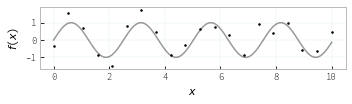

In [40]:
fig = plt.figure(figsize=thesis.figsize); ax = fig.add_subplot(111)
#ax.plot(X, y, '--', color=cm(0.4))
ax.plot(x, y, '.', ms=3, c='k');
ax.set_xlabel("$x$");
ax.set_ylabel("$f(x)$");
fig.tight_layout();
thesis.thesisify(fig, height=0.5)

xn = np.linspace(0,10,1000)
ax.plot(xn, np.sin(2.5*xn), alpha=0.4, color='k')

fig.savefig("{}/gp/gp-training-data.{}".format(fig_dir, fig_ext))

In [43]:
with pm.Model() as model:
    
    ls = pm.HalfCauchy("metric", 0.5)
    
    
    # Specify the covariance function.
    cov_func = pm.gp.cov.ExpQuad(1, ls)

    # Specify the GP.  The default mean function is `Zero`.
    gp = pm.gp.Marginal(cov_func=cov_func)

    # 
    sigma = pm.Normal("sigma", .5, .2)
    y_ = gp.marginal_likelihood("y", X=x[::,None], y=y, noise=sigma)

In [44]:
with model:
    mp = pm.find_MAP()

logp = -25.667, ||grad|| = 2.6606: 100%|██████████| 10/10 [00:00<00:00, 479.80it/s]


In [45]:
x_new = np.linspace(0,10, 200)[::,None]
mu, var = gp.predict(x_new, point=mp, diag=True)
sd = np.sqrt(var)

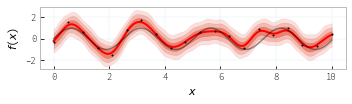

In [63]:
# draw plot
fig = plt.figure(figsize=thesis.figsize); ax = fig.add_subplot(111)

# plot mean and 2σ intervals
ax.plot(x_new, mu, 'r', lw=2, label="mean and 2 sigma region");
for deviation in range(1,4):
    plt.fill_between(x_new.flatten(), mu - deviation*sd, mu + deviation*sd, color=thesis.colors['red'], alpha=0.5/deviation)

# plot original data and true function
ax.plot(x, y, 'ok', ms=1, alpha=1.0, label="observed data");
#plt.plot(x, np.sin(x), "dodgerblue", lw=1, label="true f");
xn = np.linspace(0,10,1000)
ax.plot(xn, np.sin(2.5*xn), alpha=0.4, color='k')
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
fig.tight_layout()
thesis.thesisify(fig, height=0.5)
#plt.title(u"predictive mean and 2σ interval"); plt.legend();
fig.savefig("{}/gp/gp-posterior-meancovar.{}".format(fig_dir, fig_ext) )

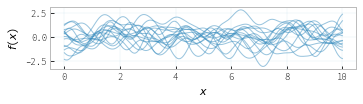

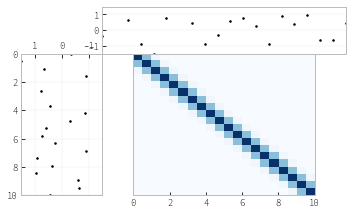

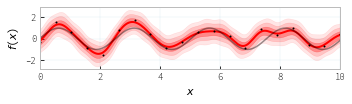

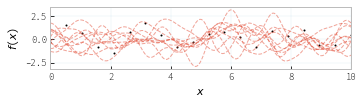

In [62]:
#asc = float(mp['amplitude'])
ls = float(mp['metric'])
#ls= 0.25


with pm.Model() as model:
    
    #ls = pm.Gamma("metric", 1,5)
    
    
    # Specify the covariance function.
    cov_func = pm.gp.cov.ExpQuad(1, ls)

    # Specify the GP.  The default mean function is `Zero`.
    gp = pm.gp.Marginal(cov_func=cov_func)

    # 
    sigma = pm.Normal("sigma", 1, 5)
    y_ = gp.marginal_likelihood("y", X=x[::,None], y=y, noise=sigma)

fig = plt.figure(figsize=thesis.figsize)
ax = fig.add_subplot(111)
K = cov_func(x_new).eval()
ax.plot(x_new, pm.MvNormal.dist(mu=np.zeros(K.shape[0]), cov=K).random(size=15).T, 
             alpha = 0.5, c=thesis.colors['blue'], lw=1, #linestyle="--"
            );
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
fig.tight_layout();
thesis.thesisify(fig, height=0.5)
fig.savefig("{}/gp/gp-example-prior-draws.{}".format(fig_dir, fig_ext) )

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2,2, width_ratios=[1,3],
                       height_ratios=[1,3])

fig = plt.figure(figsize=thesis.figsize)
ax = plt.subplot(gs[1:, 0], )
ax.plot(y,x, '.', ms=3, c='k');

ax.set_ylim([10,0])
ax.set_xlim([1.5, -1.5])
ax.grid(False)
ax.xaxis.tick_top()
ax.set_xticks([-1, 0, 1])
#fig, ax = plt.subplots(2,2, )#, sharex=True, sharey=True);
K = cov_func(x[::,None]).eval()
ax = plt.subplot(gs[1:, 1:])
m = ax.imshow(K, cmap="Blues", interpolation='none', extent = [x.min(), x.max(), x.min(), x.max()], aspect=.78)
ax.set_yticks([])

ax.grid(False)
ax = plt.subplot(gs[0, 1:], )
ax.set_xticks([])
ax.plot(x,y, '.', ms=3, c='k');
ax.set_xlim([0,10])
ax.set_yticks([-1, 0, 1])
ax.set_ylim([-1.5, 1.5])
ax.grid(False)
gs.update(hspace=0., wspace=0.)
thesis.thesisify(fig)
#fig.savefig("../figures/gp-example-expsqcov-matrix.pdf")

plt.tight_layout()

x_new = np.linspace(0,10, 200)[::,None]
mu, var = gp.predict(x_new,  point=mp, diag=True)
sd = np.sqrt(var)

# draw plot
fig = plt.figure(figsize=thesis.figsize); ax = fig.add_subplot(111)

# plot mean and 2σ intervals
ax.plot(x_new, mu, 'r', lw=2, label="mean and 2 sigma region");
for deviation in range(1,4):
    ax.fill_between(x_new.flatten(), mu - deviation*sd, mu + deviation*sd, color="r", alpha=0.3/deviation)

# plot original data and true function
ax.plot(x, y, 'ok', ms=1, alpha=1.0, label="observed data");
#plt.plot(x, np.sin(x), "dodgerblue", lw=1, label="true f");

ax.set_xlabel("$x$");
thesis.thesisify(fig, height=0.5)
fig.tight_layout()


#K = cov_func(x_new).eval()
#ax.plot(x_new, pm.MvNormal.dist(mu=np.zeros(K.shape[0]), cov=K).random(size=10).T, 
#             alpha = 0.5, c=thesis_colors['red'], lw=1, linestyle="--",
#            );
ax.set_xlim([0,10])
ax.set_xlabel("$x$");# plt.ylim([-13,13]);
thesis.thesisify(fig, height=0.5)
xn = np.linspace(0,10,1000)
ax.plot(xn, np.sin(2.5*xn), alpha=0.4, color='k')
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
fig.tight_layout()
fig.savefig("{}/gp/gp-example-posterior-meancovar.{}".format(fig_dir, fig_ext))

# draw plot
fig = plt.figure(figsize=thesis.figsize); ax = fig.add_subplot(111)

# plot mean and 2σ intervals
#plt.plot(x_new, mu, 'r', lw=2, label="mean and 2σ region");
#for deviation in range(1,4):
#   plt.fill_between(x_new.flatten(), mu - deviation*sd, mu + deviation*sd, color="r", alpha=0.3/deviation)

# plot original data and true function
ax.plot(x, y, 'ok', ms=1, alpha=1.0, label="observed data");
#plt.plot(x, np.sin(x), "dodgerblue", lw=1, label="true f");

plt.xlabel("$x$");
plt.tight_layout()

K = cov_func(x_new).eval()
ax.plot(x_new, pm.MvNormal.dist(mu=np.zeros(K.shape[0]), cov=K).random(size=10).T, 
             alpha = 0.5, c=thesis.colors['red'], lw=1, linestyle="--",
            );
ax.set_xlim([0,10])
ax.set_xlabel("$x$");# plt.ylim([-13,13]);
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
fig.tight_layout()
thesis.thesisify(fig, height=0.5)
fig.savefig("{}/gp/gp-example-posterior-draws.{}".format(fig_dir, fig_ext))